<a href="https://colab.research.google.com/github/Praneeth-376/LoanApprovalPrediction/blob/main/LoanApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv('/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:

df.ffill(inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [36]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Apply forward fill to impute missing values in X
X.ffill(inplace=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.impute import SimpleImputer

# Fill missing values with the mean (or median)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7642276422764228


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7479674796747967


In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.6178861788617886


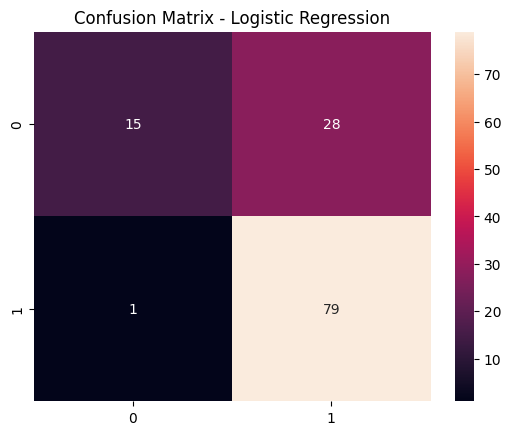

In [42]:
confusion = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confusion, annot=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [43]:
# Store accuracies
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn)
    ]
}

results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Accuracy
0,Logistic Regression,0.764228
1,Decision Tree,0.747967
2,K-Nearest Neighbors,0.617886


/tmp/ipython-input-44-3537947336.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


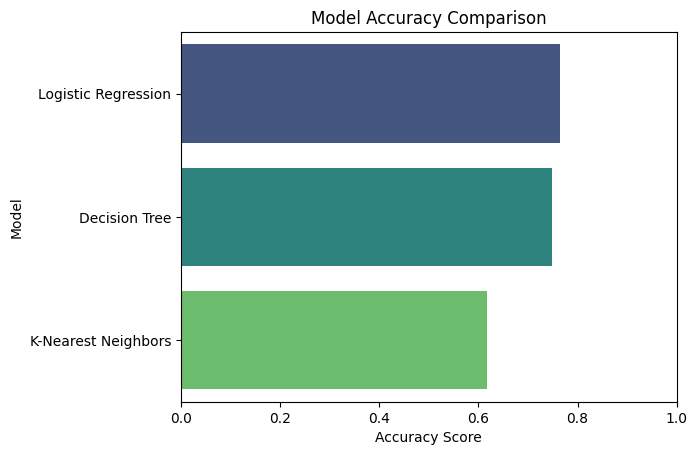

In [44]:
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


In [45]:
import joblib

# Save the trained model
joblib.dump(lr, 'loan_model.pkl')

# Save the scaler too (important!)
joblib.dump(scaler, 'scaler.pkl')

# Save the LabelEncoders if needed
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [46]:
!pip install streamlit
!pip install pyngrok


In [53]:
# @title 2. Upload your Dataset Files
# This cell will prompt you to upload your train.csv and test.csv files.
from google.colab import files
import os

# Check if files already exist to avoid re-uploading on re-run
if not os.path.exists('/train.csv') or not os.path.exists('/test.csv'):
    print("Please upload your 'train.csv' and 'test.csv' files.")
    uploaded = files.upload()

    if 'train.csv' not in uploaded or 'test.csv' not in uploaded:
        print("Both 'train.csv' and 'test.csv' must be uploaded.")
    else:
        print("Files uploaded successfully!")
else:
    print("Files 'train.csv' and 'test.csv' already exist. Skipping upload.")

Files 'train.csv' and 'test.csv' already exist. Skipping upload.


In [62]:
# @title 3. Train Model and Save Preprocessors (SIMPLIFIED Loan_ID DROP)
# This cell performs the data preprocessing, model training, and saves
# the fitted preprocessors, the trained model, AND the final feature names.

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import joblib
import numpy as np

# --- 1. Load your existing datasets ---
try:
    df_train = pd.read_csv('/train.csv')
    df_test = pd.read_csv('/test.csv') # Load test data
    print("\nTrain and Test datasets loaded successfully.")
except FileNotFoundError:
    print("\nError: train.csv or test.csv not found. Please ensure they are uploaded.")
    raise # Re-raise the error to stop execution if files are missing

# Identify target variable and features from the training data
X_train_df = df_train.drop('Loan_Status', axis=1)
y_train = df_train['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0) # Convert Y/N to 1/0

X_test_df = df_test.copy()

print(f"\n--- Initial df_train columns: {df_train.columns.tolist()} ---")
print(f"--- Initial df_test columns: {df_test.columns.tolist()} ---")


# --- IMPORTANT FIX: Directly Drop Loan_ID column ---
# Based on your outputs, the column is literally named 'Loan_ID'.
# This direct drop is the most reliable way to remove it if it exists.
if 'Loan_ID' in X_train_df.columns:
    X_train_df = X_train_df.drop('Loan_ID', axis=1)
    print("Dropped 'Loan_ID' from X_train_df successfully.")
else:
    print("Warning: 'Loan_ID' not found in X_train_df. Check column names if this is unexpected.")

if 'Loan_ID' in X_test_df.columns:
    X_test_df = X_test_df.drop('Loan_ID', axis=1)
    print("Dropped 'Loan_ID' from X_test_df successfully.")
else:
    print("Warning: 'Loan_ID' not found in X_test_df. Check column names if this is unexpected.")


print("\n--- X_train_df Info AFTER dropping Loan_ID ---")
X_train_df.info() # Print info to see data types and non-null counts
print("\n--- X_train_df Head AFTER dropping Loan_ID ---")
print(X_train_df.head()) # Print head to see actual values
print(f"\n--- X_train_df columns after Loan_ID drop: {X_train_df.columns.tolist()} ---")


print("\n--- X_test_df Info AFTER dropping Loan_ID ---")
X_test_df.info() # Print info to see data types and non-null counts
print("\n--- X_test_df Head AFTER dropping Loan_ID ---")
print(X_test_df.head()) # Print head to see actual values
print(f"\n--- X_test_df columns after Loan_ID drop: {X_test_df.columns.tolist()} ---")


# Identify categorical and numerical features from your dataset
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Filter these lists to only include columns actually present in the DataFrame
categorical_features = [f for f in categorical_features if f in X_train_df.columns]
numerical_features = [f for f in numerical_features if f in X_train_df.columns]

print(f"\n--- Categorical features used: {categorical_features} ---")
print(f"--- Numerical features used: {numerical_features} ---")

# --- 2. Preprocessing and Model Training ---

# 2.1. Label Encoding for Categorical Features
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_dependents = LabelEncoder()
le_education = LabelEncoder()
le_self_employed = LabelEncoder()
le_property_area = LabelEncoder()

# Map features to their encoders
feature_encoders = {
    'Gender': le_gender,
    'Married': le_married,
    'Dependents': le_dependents,
    'Education': le_education,
    'Self_Employed': le_self_employed,
    'Property_Area': le_property_area
}

for col in categorical_features:
    encoder = feature_encoders[col]
    X_train_df[col] = encoder.fit_transform(X_train_df[col].astype(str))
    X_test_df[col] = encoder.transform(X_test_df[col].astype(str)) # Transform test data using fitted encoder

# 2.2. Impute missing numerical values (if any)
imputer = SimpleImputer(strategy='mean')
X_train_df[numerical_features] = imputer.fit_transform(X_train_df[numerical_features])
X_test_df[numerical_features] = imputer.transform(X_test_df[numerical_features])


# 2.3. Feature Scaling for Numerical Features
scaler = StandardScaler()
X_train_df[numerical_features] = scaler.fit_transform(X_train_df[numerical_features])
X_test_df[numerical_features] = scaler.transform(X_test_df[numerical_features])


# 2.4. Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

print("\n--- X_train_df Columns BEFORE model.fit() ---")
print(X_train_df.columns.tolist())
print("\n--- X_train_df Dtypes BEFORE model.fit() ---")
print(X_train_df.dtypes)
print("\n--- X_train_df Head BEFORE model.fit() ---")
print(X_train_df.head())


model.fit(X_train_df, y_train)


# --- 3. Save the fitted components ---
joblib.dump(le_gender, 'le_gender.pkl')
joblib.dump(le_married, 'le_married.pkl')
joblib.dump(le_dependents, 'le_dependents.pkl')
joblib.dump(le_education, 'le_education.pkl')
joblib.dump(le_self_employed, 'le_self_employed.pkl')
joblib.dump(le_property_area, 'le_property_area.pkl')
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'model.pkl')

# Get the final list of columns used for training the model
final_model_features = X_train_df.columns.tolist()
joblib.dump(final_model_features, 'model_features.pkl')

print(f"\n--- Final features saved in model_features.pkl: {final_model_features} ---")
print("All preprocessors, model, and feature names saved successfully!")
print("Proceed to the next cell to verify .pkl files.")


Train and Test datasets loaded successfully.

--- Initial df_train columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'] ---
--- Initial df_test columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'] ---
Dropped 'Loan_ID' from X_train_df successfully.
Dropped 'Loan_ID' from X_test_df successfully.

--- X_train_df Info AFTER dropping Loan_ID ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Educat

In [59]:
# @title 4. Verify .pkl files were created
# This command lists the .pkl files. They MUST be present for app.py to work.
!ls -lh *.pkl

-rw-r--r-- 1 root root  863 Jul 26 16:53 imputer.pkl
-rw-r--r-- 1 root root   94 Jul 26 16:29 label_encoder.pkl
-rw-r--r-- 1 root root  496 Jul 26 16:53 le_dependents.pkl
-rw-r--r-- 1 root root  499 Jul 26 16:53 le_education.pkl
-rw-r--r-- 1 root root  495 Jul 26 16:53 le_gender.pkl
-rw-r--r-- 1 root root  490 Jul 26 16:53 le_married.pkl
-rw-r--r-- 1 root root  501 Jul 26 16:53 le_property_area.pkl
-rw-r--r-- 1 root root  490 Jul 26 16:53 le_self_employed.pkl
-rw-r--r-- 1 root root  959 Jul 26 16:29 loan_model.pkl
-rw-r--r-- 1 root root  179 Jul 26 16:53 model_features.pkl
-rw-r--r-- 1 root root 1.4K Jul 26 16:53 model.pkl
-rw-r--r-- 1 root root 1.1K Jul 26 16:53 scaler.pkl


In [60]:
# @title 5. Streamlit Application Code (app.py - UPDATED WITH MORE DIAGNOSTICS)
# This cell writes your Streamlit app code to a file named 'app.py'.
# The app will load the .pkl files created in the previous step, including feature names.

%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# --- 1. Load Pre-trained Model and Preprocessors ---
@st.cache_resource # Cache the loading of resources to avoid re-loading on every rerun
def load_resources():
    try:
        # Load each specific LabelEncoder
        le_gender = joblib.load('le_gender.pkl')
        le_married = joblib.load('le_married.pkl')
        le_dependents = joblib.load('le_dependents.pkl')
        le_education = joblib.load('le_education.pkl')
        le_self_employed = joblib.load('le_self_employed.pkl')
        le_property_area = joblib.load('le_property_area.pkl')

        # Load imputer, scaler, and model
        imputer = joblib.load('imputer.pkl')
        scaler = joblib.load('scaler.pkl')
        model = joblib.load('model.pkl')

        # Load the list of feature names used during training
        model_features = joblib.load('model_features.pkl')

        return le_gender, le_married, le_dependents, le_education, le_self_employed, le_property_area, imputer, scaler, model, model_features
    except FileNotFoundError:
        st.error("Error: Model or preprocessor files not found. Please ensure Cell 3 (Train Model) was run successfully and all .pkl files were created.")
        st.stop() # Stop the app if files are missing

# Assign the loaded resources to their respective variables
le_gender, le_married, le_dependents, le_education, le_self_employed, le_property_area, imputer, scaler, model, model_features = load_resources()

# --- 2. Streamlit UI ---
st.set_page_config(page_title="Loan Approval Prediction", layout="centered")
st.title("🏡 Loan Approval Prediction App")
st.markdown("""
    Fill in the details below to predict if a loan will be approved.
""")

# Input fields for user
st.header("Applicant Information")

col1, col2 = st.columns(2)
with col1:
    gender = st.selectbox("Gender", ['Male', 'Female'])
    married = st.selectbox("Married", ['Yes', 'No'])
    dependents = st.selectbox("Dependents", ['0', '1', '2', '3+'])
    education = st.selectbox("Education", ['Graduate', 'Not Graduate'])
    self_employed = st.selectbox("Self Employed", ['No', 'Yes'])
with col2:
    applicant_income = st.number_input("Applicant Income ($)", min_value=0, value=5000)
    coapplicant_income = st.number_input("Coapplicant Income ($)", min_value=0, value=0)
    loan_amount = st.number_input("Loan Amount ($)", min_value=0, value=120)
    loan_amount_term = st.selectbox("Loan Amount Term (Days)", [12, 36, 60, 120, 180, 240, 300, 360, 480], index=7)
    credit_history = st.selectbox("Credit History (1: Good, 0: Bad)", [1.0, 0.0])
    property_area = st.selectbox("Property Area", ['Urban', 'Rural', 'Semiurban'])

# --- 3. Prediction Logic ---
if st.button("Predict Loan Status"):
    # Create a DataFrame from user inputs
    input_data = pd.DataFrame({
        'Gender': [gender],
        'Married': [married],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history],
        'Property_Area': [property_area]
    })

    # Apply transformations in the same order as in training
    try:
        # Categorical features encoding using the LOADED, FITTED specific encoders
        # Convert to string to handle potential non-string inputs from Streamlit selectbox
        input_data['Gender'] = le_gender.transform(input_data['Gender'].astype(str))
        input_data['Married'] = le_married.transform(input_data['Married'].astype(str))
        input_data['Dependents'] = le_dependents.transform(input_data['Dependents'].astype(str))
        input_data['Education'] = le_education.transform(input_data['Education'].astype(str))
        input_data['Self_Employed'] = le_self_employed.transform(input_data['Self_Employed'].astype(str))
        input_data['Property_Area'] = le_property_area.transform(input_data['Property_Area'].astype(str))

        # Numerical features for imputation and scaling
        numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

        # Imputation
        input_data[numerical_cols] = imputer.transform(input_data[numerical_cols])

        # Scaling
        input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])

        # --- IMPORTANT FIX: Reorder columns to match training features ---
        # Select and reorder columns of input_data to match model_features (the columns used during training)
        # This is CRUCIAL for models that expect features in a specific order and with exact names.
        input_data_processed = input_data[model_features]

        print("\n--- input_data_processed Columns BEFORE model.predict() ---")
        print(input_data_processed.columns.tolist())
        print("\n--- input_data_processed Dtypes BEFORE model.predict() ---")
        print(input_data_processed.dtypes)
        print("\n--- input_data_processed Head BEFORE model.predict() ---")
        print(input_data_processed.head())

        # Make prediction
        prediction = model.predict(input_data_processed) # Use the reordered DataFrame
        prediction_proba = model.predict_proba(input_data_processed)

        st.subheader("Prediction Result")
        if prediction[0] == 1:
            st.success(f"**Loan Approved!** 🎉 (Probability: {prediction_proba[0][1]*100:.2f}%)")
        else:
            st.error(f"**Loan Not Approved.** 🙁 (Probability: {prediction_proba[0][0]*100:.2f}%)")

        st.markdown("---")
        st.info("Disclaimer: This is a demo for educational purposes. Real loan decisions involve complex factors.")

    except ValueError as e:
        st.error(f"Prediction Error: {e}. This usually means an input value was not seen during model training or there's a data type mismatch, or column mismatch.")
    except Exception as e:
        st.error(f"An unexpected error occurred: {e}")

Overwriting app.py


In [61]:

!streamlit app.py

Usage: streamlit [OPTIONS] COMMAND [ARGS]...
Try 'streamlit --help' for help.

Error: No such command 'app.py'.
